# Practical 8 (Part III) - Recommender System (Collaborative Filtering)

Recommender systems are algorithms aimed at suggesting relevant items to users. Collaborative filtering based solely on the past interactions recorded between users and items in order to produce new recommendations. These interactions are stored in the so-called “user-item interactions matrix”. This practical demonstrates how to build a recommender system that identify movies to view based on collaborative filtering method.

## Section 1 Data Preparation

1. Reading data from files

"file.tsv" contains 100,003 rows of records that store the user ratings as shown in the table below.

| user_id | item_id | rating | timestamp |
| --- | --- | --- | --- |
|0 | 50 |	5 |	881250949|
|0 | 172 |	5 |	881250949|
|0 | 133 |	1 |	881250949|
|196 | 242 | 3 | 881250949|
|186 | 302 | 3 | 891717742|

On the other hand, "Movie_Id_Titles.csv" contains 1682 movie titles associated with their item_id.

In [4]:
# import pandas library
import pandas as pd

# Get the data
column_names = ['user_id','item_id','rating','timestamp']                           #compare user id, item id, rating (timestamp show the time the user rating)

path = 'file.tsv'                                   #complete this

# tsv is tab-separated values file
df = pd.read_csv(path, sep='\t', names=column_names)

# Check the head of the data
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
# Check out all the movies and their respective IDs
movie_titles = pd.read_csv('Movie_Id_Titles.csv')              #complete this
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


<hr/>
2. Now let's merge these 2 files together.
<hr/>

In [6]:
data = pd.merge(df, movie_titles, on='item_id')               #complete this
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


<hr/>
3. We need to group the movie titles and view their ratings in the descending order.
<hr/>

In [7]:
# Calculate mean rating of all movies
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

## Section 2 Data Exploration

4 . Let's observe the top rated movies

In [8]:
# Calculate count rating of all movies
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [9]:
data.groupby('title').count().info            #complete this

<bound method DataFrame.info of                                        user_id  item_id  rating  timestamp
title                                                                     
'Til There Was You (1997)                    9        9       9          9
1-900 (1994)                                 5        5       5          5
101 Dalmatians (1996)                      109      109     109        109
12 Angry Men (1957)                        125      125     125        125
187 (1997)                                  41       41      41         41
...                                        ...      ...     ...        ...
Young Guns II (1990)                        44       44      44         44
Young Poisoner's Handbook, The (1995)       41       41      41         41
Zeus and Roxanne (1997)                      6        6       6          6
unknown                                      9        9       9          9
Á köldum klaka (Cold Fever) (1994)           1        1       1     

5. We can observe that there are 1664 movies with rating. Let's calculate the average rating of each movie

In [10]:
# creating dataframe with 'rating' count values
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())                                            #complete this
print(ratings)

#add another column called "num of ratings" that count the total rating
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())                                             #complete this
print(ratings['num of ratings'])

                                         rating
title                                          
'Til There Was You (1997)              2.333333
1-900 (1994)                           2.600000
101 Dalmatians (1996)                  2.908257
12 Angry Men (1957)                    4.344000
187 (1997)                             3.024390
...                                         ...
Young Guns II (1990)                   2.772727
Young Poisoner's Handbook, The (1995)  3.341463
Zeus and Roxanne (1997)                2.166667
unknown                                3.444444
Á köldum klaka (Cold Fever) (1994)     3.000000

[1664 rows x 1 columns]
title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The

6. Let's create a histogram to check out the number of ratings received against the count

<Axes: >

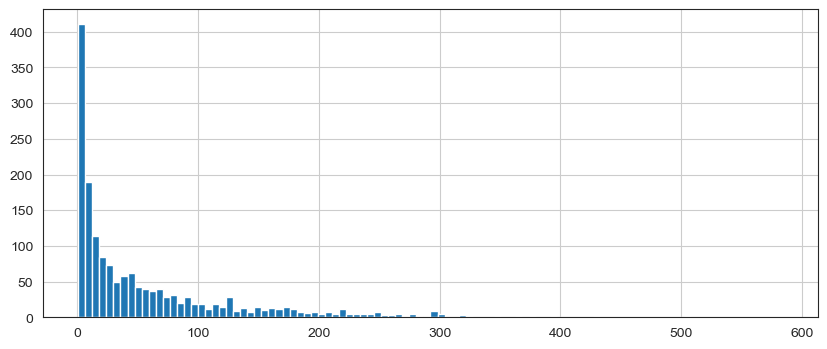

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))

ratings['num of ratings'].hist(bins = 100)

From the histogram, we can observe that majority of the movies (more than 500) obtained less than 10 ratings

<Axes: >

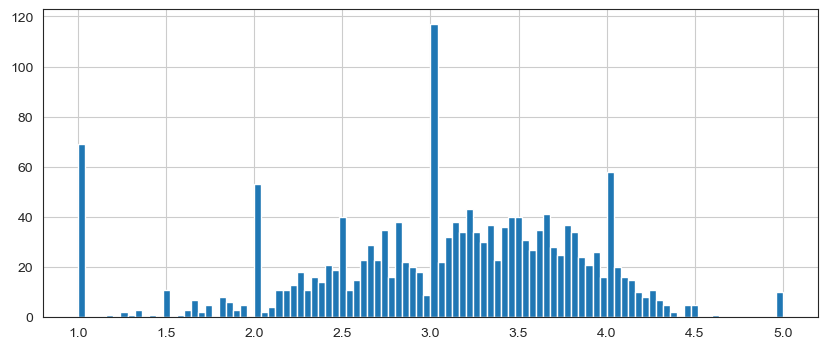

In [12]:
# plot graph of 'ratings' column
plt.figure(figsize =(10, 4))

ratings['rating'].hist(bins = 100)

From the histogram, we can observe that majority of the movies (more than120) obtained a rating around 3.

## Section 3 Building User-Item Interactions Matrix

User-item matrix is a basic foundation of traditional collaborative filtering techniques. In this practical, the rating for target movie item i for an active user can be predicted by using a simple weighted average (mean).

![image.png](attachment:image.png)

7. Let's build the user-item matrix

In [13]:
# use pivot table to build a matrix
# Sorting values according to the 'num of rating column'
moviemat = data.pivot_table(index ='user_id',
              columns ='title', values ='rating')           #complete this

moviemat.head()

# ratings.sort_values('num of ratings', ascending = False).head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


8. Now check out the Star Wars movie

In [16]:
# analysing correlation with similar movies
starwars_user_ratings = moviemat['Star Wars (1977)']               # our input
starwars_user_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

9. We are interested to find out movies with similar ratings

In [19]:
# find the correlation
# analysing correlation with similar movies
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)            #complete this

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])   #complete this
corr_starwars.dropna(inplace = True)

corr_starwars.head()

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [22]:
# Similar movies like starwars
corr_starwars.sort_values('Correlation', ascending = False).head(10)                                                    #complete this
corr_starwars = corr_starwars.join(ratings['num of ratings'])

corr_starwars.head()

# filter = only remain the rating >100
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


## Exercise

Perform steps in <b>Section 3</b> to recommend similar movies to the user if he likes

1) Liar Liar (1997)

2) Return of the Jedi (1983)